In [1]:
import geopandas as gpd

%matplotlib inline

fp = "Europe_borders.shp"

data = gpd.read_file(fp)

{'init': 'epsg:4326'}

0    (POLYGON ((19.50115199999999 40.96229600000001...
1    POLYGON ((1.439921999999996 42.60649100000001,...
2    POLYGON ((16 48.77775199999999, 16 48.78252000...
3    POLYGON ((5 49.79374300000001, 4.9972390000000...
4    POLYGON ((19.22947300000001 43.534584, 19.2292...
Name: geometry, dtype: object

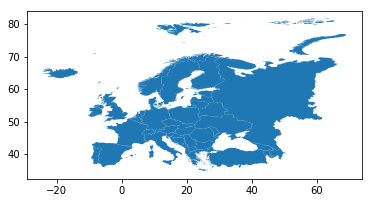

In [2]:

display(data.crs)

display(data['geometry'].head())

data.plot()

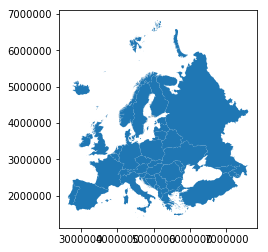

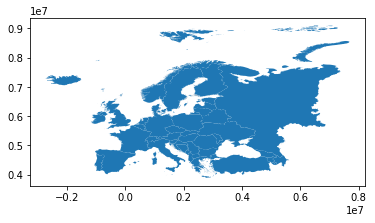

In [3]:
data_proj = data.copy()
data_proj = data_proj.to_crs(epsg=3035)

data_proj['geometry'].head()
data_proj.plot()

data_proj_4087 = data.copy()
data_proj_4087 = data_proj.to_crs(epsg=4087)

data_proj_4087['geometry'].head()
data_proj_4087.plot()

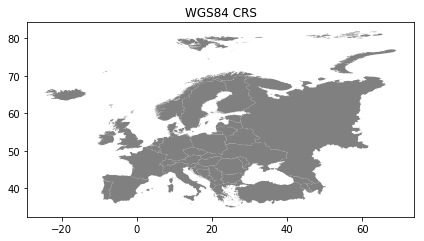

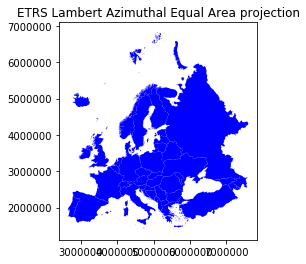

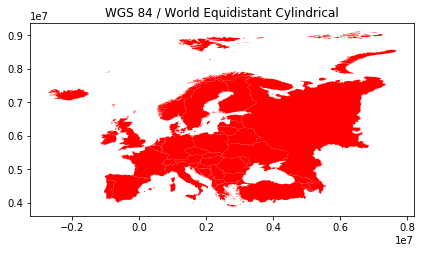

In [4]:
import matplotlib.pyplot as plt

# Plot the WGS84
data.plot(facecolor='gray');

# Add title
plt.title("WGS84 CRS");

# Remove empty white space around the plot
plt.tight_layout()

# Plot the one with ETRS-LAEA projection
data_proj.plot(facecolor='blue');

# Add title
plt.title("ETRS Lambert Azimuthal Equal Area projection");

# Plot the one with ETRS-LAEA projection
data_proj_4087.plot(facecolor='red');

# Add title
plt.title("WGS 84 / World Equidistant Cylindrical");

# Remove empty white space around the plot
plt.tight_layout()

In [5]:
# Ouput file path
out_fp = r"Europe_borders_epsg3035.shp"

# EPSG:3035 = '+proj=laea +lat_0=52 +lon_0=10 +x_0=4321000 +y_0=3210000 +ellps=GRS80 +units=m +no_defs'
# EPSG:3035 = +proj=laea +lat_0=52 +lon_0=10 +x_0=4321000 +y_0=3210000 +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs 

print(data_proj.crs)

# Save to disk
data_proj.to_file(out_fp)

{'init': 'epsg:3035', 'no_defs': True}


In [6]:
from shapely.geometry import Point
from fiona.crs import from_epsg

# sr-org projection 7669 - epsg:4087 wgs 84 / world equidistant cylindrical
# http://spatialreference.org/ref/sr-org/7669/

# EPSG:32662 DEPRECATED WGS 84 / Plate Carree
# https://epsg.io/32662
# +proj=eqc +lat_ts=0 +lat_0=0 +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs 

# https://epsg.io/4087
# +proj=eqc +lat_ts=0 +lat_0=0 +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs 
proj4_txt_eqc = '+proj=eqc +lat_ts=0 +lat_0=0 +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs '

# ESRI:54032 world-azimuthal-equidistant
# https://epsg.io/54032
# +proj=aeqd +lat_0=0 +lon_0=0 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m no_defs
proj4_txt_aeqd1 = '+proj=aeqd +lat_0=0 +lon_0=0 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m no_defs'

# http://spatialreference.org/ref/esri/54032/
# +proj=aeqd +lat_0=0 +lon_0=0 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m +no_defs
proj4_txt_aeqd2 = '+proj=aeqd +lat_0=0 +lon_0=0 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m +no_defs'

tartu_lon = 26.7290
tartu_lat = 58.3780


proj4_txt = '+proj=eqc +lat_ts=60 +lat_0=58.3780 +lon_0=26.7290 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m +no_defs'

proj4_txt_aeqd2_tartu = '+proj=aeqd +lat_0=58.3780 +lon_0=26.7290 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m +no_defs'

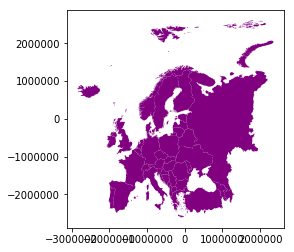

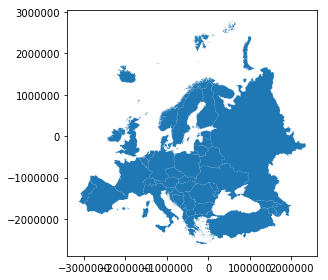

In [7]:
data_d = data.to_crs(proj4_txt)
data_d.plot(facecolor='purple');

data_proj_aeqd2_tartu = data.copy()
data_proj_aeqd2_tartu = data_proj_aeqd2_tartu.to_crs(proj4_txt_aeqd2_tartu)

data_proj_aeqd2_tartu['geometry'].head()
data_proj_aeqd2_tartu.plot()

plt.tight_layout();

In [8]:
tartu = gpd.GeoSeries([Point(tartu_lon, tartu_lat)], crs=from_epsg(4326))

tartu = tartu.to_crs(proj4_txt)

tartu_3035 = tartu.to_crs(epsg=3035)
tartu_4087 = tartu.to_crs(epsg=4087)

tartu_aeqd2 = tartu.to_crs(proj4_txt_aeqd2_tartu)
# data_proj_4087

print(tartu)
print(tartu_3035)
print(tartu_4087)
print(tartu_aeqd2)

0    POINT (0 0)
dtype: object
0    POINT (5290902.38330074 4034180.855397624)
dtype: object
0    POINT (2975458.669413409 6498609.233529724)
dtype: object
0    POINT (0 0)
dtype: object


In [9]:
data_d['country_centroid'] = data_d.centroid
display(data_d.head(2))


data_proj['country_centroid'] = data_proj.centroid
display(data_proj.head(2))

data_proj_4087['country_centroid'] = data_proj_4087.centroid
display(data_proj_4087.head(2))


data_proj_aeqd2_tartu['country_centroid'] = data_proj_aeqd2_tartu.centroid
display(data_proj_aeqd2_tartu.head(2))

,NAME,ORGN_NAME,geometry,country_centroid
0,Albania,Shqipëria,(POLYGON ((-402300.1794455911 -1938707.3010863...,POINT (-370310.9161125332 -1918217.695343643)
1,Andorra,Andorra,POLYGON ((-1407583.642795689 -1755676.35092153...,POINT (-1399996.593452328 -1761891.340226577)


,NAME,ORGN_NAME,geometry,country_centroid
0,Albania,Shqipëria,(POLYGON ((5122010.374968257 2035145.185739247...,POINT (5167869.747176255 2060866.504532086)
1,Andorra,Andorra,"POLYGON ((3618045.757868871 2206753.800991116,...",POINT (3628539.326495936 2199335.635429485)


,NAME,ORGN_NAME,geometry,country_centroid
0,Albania,Shqipëria,(POLYGON ((2170858.310522227 4559901.931732613...,POINT (2234836.837188475 4580391.537483144)
1,Andorra,Andorra,"POLYGON ((160291.3838220317 4742932.881979366,...",POINT (175465.4825087514 4736717.89267163)


,NAME,ORGN_NAME,geometry,country_centroid
0,Albania,Shqipëria,(POLYGON ((-616930.8489551456 -1905901.3780810...,POINT (-566125.4395884104 -1891201.933676238)
1,Andorra,Andorra,POLYGON ((-2059909.805611565 -1383253.28615459...,POINT (-2051296.405115046 -1393144.786901843)


In [13]:
data_4326 = data_d.to_crs(epsg=4326)

data_4326['country_centroid'] = data_4326.centroid
display(data_4326)

,NAME,ORGN_NAME,geometry,country_centroid
0,Albania,Shqipëria,(POLYGON ((19.50115199999999 40.96229600000002...,POINT (20.07588088359621 41.14635726004281)
1,Andorra,Andorra,"POLYGON ((1.439921999999996 42.60649100000001,...",POINT (1.576233247730188 42.55066080116637)
2,Austria,Österreich,"POLYGON ((16 48.77775199999999, 16 48.78252000...",POINT (14.14002818957723 47.58852668320868)
3,Belgium,België / Belgique,"POLYGON ((5.000000000000001 49.79374300000001,...",POINT (4.66087687811965 50.64171451294563)
4,Bosnia Herzegovina,Bosna i Hercegovina,"POLYGON ((19.22947300000001 43.534584, 19.2292...",POINT (17.77724351067377 44.17571548450272)
5,Croatia,Hrvatska,"(POLYGON ((14.300375 44.501564, 14.289716 44.5...",POINT (16.42197742918361 45.02559290559658)
6,Czech Republic,Cesko,"POLYGON ((14.825232 50.87399300000001, 14.8368...",POINT (15.33447373771893 49.7391480060166)
7,Denmark,Danmark,(POLYGON ((11.99977999999999 54.94117700000001...,POINT (10.02618944938101 55.98702707119133)
8,Estonia,Eesti,(POLYGON ((23.97510700000001 58.09690900000002...,POINT (25.55015765901333 58.67332877816263)
9,Finland,Suomi,"(POLYGON ((22.07309900000001 60.228298, 22.065...",POINT (26.23987660040063 64.48146321808261)


In [10]:
def calculateDistance(row, dest_geom, src_col='geometry', target_col='distance'):
    """
    Calculates the distance between a single Shapely Point geometry and a GeoDataFrame with Point geometries.

    Parameters
    ----------
    dest_geom : shapely.Point
        A single Shapely Point geometry to which the distances will be calculated to.
    src_col : str
        A name of the column that has the Shapely Point objects from where the distances will be calculated from.
    target_col : str
        A name of the target column where the result will be stored.
    """
    # Calculate the distances
    dist = row[src_col].distance(dest_geom)
    # Tranform into kilometers
    dist_km = dist/1000
    # Assign the distance to the original data
    row[target_col] = dist_km
    return row

In [11]:
tartu_geom = tartu.get(0)
print(tartu_geom)

tartu_geom_3035 = tartu_3035.get(0)
print(tartu_geom_3035)

tartu_geom_4087 = tartu_4087.get(0)
print(tartu_geom_4087)


tartu_geom_aeqd2 = tartu_aeqd2.get(0)
print(tartu_geom_aeqd2)

POINT (0 0)
POINT (5290902.38330074 4034180.855397624)
POINT (2975458.669413409 6498609.233529724)
POINT (0 0)


In [12]:
data_d = data_d.apply(calculateDistance, dest_geom=tartu_geom, src_col='country_centroid', target_col='dist_to_tartu', axis=1)
display(data_d.head(20))

data_proj = data_proj.apply(calculateDistance, dest_geom=tartu_geom_3035, src_col='country_centroid', target_col='dist_to_tartu', axis=1)
display(data_proj.head(20))

# data_proj_4087
data_proj_4087 = data_proj_4087.apply(calculateDistance, dest_geom=tartu_geom_4087, src_col='country_centroid', target_col='dist_to_tartu', axis=1)
display(data_proj_4087.head(20))

# tartu_geom_aeqd2
data_proj_aeqd2_tartu = data_proj_aeqd2_tartu.apply(calculateDistance, dest_geom=tartu_geom_aeqd2, src_col='country_centroid', target_col='dist_to_tartu', axis=1)
display(data_proj_aeqd2_tartu.head(20))


,NAME,ORGN_NAME,geometry,country_centroid,dist_to_tartu
0,Albania,Shqipëria,(POLYGON ((-402300.1794455911 -1938707.3010863...,POINT (-370310.9161125332 -1918217.695343643),1953.634895
1,Andorra,Andorra,POLYGON ((-1407583.642795689 -1755676.35092153...,POINT (-1399996.593452328 -1761891.340226577),2250.389201
2,Austria,Österreich,POLYGON ((-597173.4083605162 -1068694.71884914...,POINT (-700698.9657735676 -1201078.675552815),1390.528326
3,Belgium,België / Belgique,POLYGON ((-1209430.607723521 -955595.118078593...,POINT (-1228306.114345494 -861199.3610502901),1500.133411
4,Bosnia Herzegovina,Bosna i Hercegovina,POLYGON ((-417421.7634152027 -1652361.51075273...,POINT (-498252.4870485889 -1580991.080366365),1657.645420
5,Croatia,Hrvatska,(POLYGON ((-691774.1031302749 -1544717.7895454...,POINT (-573686.2520890338 -1486383.158613511),1593.251647
6,Czech Republic,Cesko,POLYGON ((-662560.6961406324 -835342.238149158...,POINT (-634216.4306738563 -961672.6050086934),1151.974253
7,Denmark,Danmark,(POLYGON ((-819824.6350910513 -382585.38630660...,POINT (-929674.1826557099 -266161.8889354753),967.024424
8,Estonia,Eesti,(POLYGON ((-153280.9832295798 -31290.906986570...,POINT (-65614.06456209203 32875.84920165679),73.389556
9,Finland,Suomi,(POLYGON ((-259146.2642519459 205974.231175811...,POINT (-27224.48388924226 679434.4175124128),679.979632


,NAME,ORGN_NAME,geometry,country_centroid,dist_to_tartu
0,Albania,Shqipëria,(POLYGON ((5122010.374968257 2035145.185739247...,POINT (5167869.747176255 2060866.504532086),1977.146064
1,Andorra,Andorra,"POLYGON ((3618045.757868871 2206753.800991116,...",POINT (3628539.326495936 2199335.635429485),2475.905474
2,Austria,Österreich,"POLYGON ((4761568.78212208 2869552.348527733, ...",POINT (4631147.195569674 2728937.248445312),1462.510780
3,Belgium,België / Belgique,"POLYGON ((3961258.261978631 2976824.238370664,...",POINT (3944209.479040761 3072545.081437438),1654.788548
4,Bosnia Herzegovina,Bosna i Hercegovina,"POLYGON ((5066801.274064774 2315488.07299847, ...",POINT (4943523.524664402 2372738.415082333),1697.369451
5,Croatia,Hrvatska,"(POLYGON ((4663467.501275592 2386592.97118268,...",POINT (4827100.144095166 2456127.096114258),1644.799740
6,Czech Republic,Cesko,"POLYGON ((4660362.002027115 3095920.075452527,...",POINT (4705636.38011329 2973034.221364771),1211.845070
7,Denmark,Danmark,(POLYGON ((4449191.637102072 3539069.631431921...,POINT (4323598.894273472 3652905.44722732),1039.734089
8,Estonia,Eesti,(POLYGON ((5140250.282085381 3968949.899158909...,POINT (5216503.622357377 4050864.886948432),76.246525
9,Finland,Suomi,"(POLYGON ((4988053.82462044 4182319.699364737,...",POINT (5100295.669539507 4660209.132852073),654.402264


,NAME,ORGN_NAME,geometry,country_centroid,dist_to_tartu
0,Albania,Shqipëria,(POLYGON ((2170858.310522227 4559901.931732613...,POINT (2234836.837188475 4580391.537483144),2056.229517
1,Andorra,Andorra,"POLYGON ((160291.3838220317 4742932.881979366,...",POINT (175465.4825087514 4736717.89267163),3308.205396
2,Austria,Österreich,"POLYGON ((1781111.852692378 5429914.514298686,...",POINT (1574060.737865135 5297530.557553954),1845.672275
3,Belgium,België / Belgique,"POLYGON ((556597.453966368 5543014.115100092, ...",POINT (518846.4407228505 5637409.872151352),2603.191883
4,Bosnia Herzegovina,Bosna i Hercegovina,"POLYGON ((2140615.142583004 4846247.722191656,...",POINT (1978953.695316704 4917618.15260539),1868.837864
5,Croatia,Hrvatska,(POLYGON ((1591910.463152859 4953891.443441964...,POINT (1828086.165235166 5012226.074393335),1877.710989
6,Czech Republic,Cesko,"POLYGON ((1650337.277132145 5663266.995059391,...",POINT (1707025.808066141 5536936.628167265),1591.771379
7,Denmark,Danmark,(POLYGON ((1335809.399231307 6116023.846989474...,POINT (1116110.304102526 6232447.344376153),1878.302024
8,Estonia,Eesti,(POLYGON ((2668896.702954249 6467318.326354907...,POINT (2844230.540289302 6531485.082549285),135.283566
9,Finland,Suomi,(POLYGON ((2457166.140909518 6704583.464539703...,POINT (2921009.701634192 7178043.650903135),681.612660


,NAME,ORGN_NAME,geometry,country_centroid,dist_to_tartu
0,Albania,Shqipëria,(POLYGON ((-616930.8489551456 -1905901.3780810...,POINT (-566125.4395884104 -1891201.933676238),1974.118225
1,Andorra,Andorra,POLYGON ((-2059909.805611565 -1383253.28615459...,POINT (-2051296.405115046 -1393144.786901843),2479.651052
2,Austria,Österreich,"POLYGON ((-789218.35432305 -1007540.792328262,...",POINT (-948755.5225977408 -1114052.80793922),1463.301302
3,Belgium,België / Belgique,POLYGON ((-1545487.014573338 -710685.915264457...,POINT (-1539443.737243495 -612758.130582221),1656.912655
4,Bosnia Herzegovina,Bosna i Hercegovina,POLYGON ((-611931.2361515207 -1618946.30735332...,POINT (-720901.3353535756 -1534770.530725556),1695.647168
5,Croatia,Hrvatska,(POLYGON ((-993254.0654611164 -1456331.3493832...,POINT (-817203.7504680672 -1426447.263159438),1643.950658
6,Czech Republic,Cesko,POLYGON ((-836233.0813217848 -763077.619956894...,POINT (-820305.7556056009 -893458.8154076235),1212.918046
7,Denmark,Danmark,(POLYGON ((-937254.7384249617 -280819.97826449...,POINT (-1031556.204533926 -139241.4327812189),1040.911322
8,Estonia,Eesti,(POLYGON ((-162360.8304676997 -27988.570148211...,POINT (-68261.6673790272 33616.46986523145),76.090225
9,Finland,Suomi,(POLYGON ((-257841.948197337 215108.6412192509...,POINT (-27931.56046824134 653427.4508199024),654.024163


In [13]:
max_dist = data_d['dist_to_tartu'].max()

mean_dist = data_d['dist_to_tartu'].mean()

print("Maximum distance to Tartu in Tartu Centred proj is {:.2f} km, and the mean distance is {:.2f} km.".format(max_dist, mean_dist))

max_dist_3035 = data_proj['dist_to_tartu'].max()

mean_dist_3035 = data_proj['dist_to_tartu'].mean()

print("Maximum distance to Tartu in European EPSG:3035 is {:.2f} km, and the mean distance is {:.2f} km.".format(max_dist_3035, mean_dist_3035))

max_dist_4087 = data_proj_4087['dist_to_tartu'].max()

mean_dist_4087 = data_proj_4087['dist_to_tartu'].mean()

print("Maximum distance to Tartu in World Equidistant EPSG:4087 is {:.2f} km, and the mean distance is {:.2f} km.".format(max_dist_4087, mean_dist_4087))


max_dist_aeqd2 = data_proj_aeqd2_tartu['dist_to_tartu'].max()

mean_dist_aeqd2 = data_proj_aeqd2_tartu['dist_to_tartu'].mean()

print("Maximum distance to Tartu in World Azimuthal Equidistant centred is {:.2f} km, and the mean distance is {:.2f} km.".format(max_dist_aeqd2, mean_dist_aeqd2))



Maximum distance to Tartu in Tartu Centred proj is 3052.27 km, and the mean distance is 1619.23 km.
Maximum distance to Tartu in European EPSG:3035 is 3392.24 km, and the mean distance is 1687.63 km.
Maximum distance to Tartu in World Equidistant EPSG:4087 is 5098.54 km, and the mean distance is 2240.48 km.
Maximum distance to Tartu in World Azimuthal Equidistant centred is 3403.98 km, and the mean distance is 1688.60 km.


In [ ]:
#By using Harvesine formula it should be 3403km

In [2]:
from haversine import haversine, Unit

In [4]:
tartu = (58.3780, 26.7290) # (lat, lon)
gibtraltar = (36.13895, -5.34756)

haversine(tartu, gibtraltar)

3399.692604597573

In [ ]:
tartu_lon = 26.7290
tartu_lat = 58.3780

-5.347561735066087 36.13895040010905